In [1]:
pip install qiskit_machine_learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | / done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 10.7 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=104408 sha256=e2d643852f86a6bbca7bb27138568f0cf5a590bf082c1e908dc268d8c360cc08
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw
No

In [2]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=c4bfecbbd06cf2c3613f204437b02d5c02dd8a5c27207958606a6ee44f18c017
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 73.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install qiskit-algorithms

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
import pylatexenc
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import RealAmplitudes
# from qiskit.algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
from qiskit_machine_learning.algorithms.classifiers import VQC


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Today, we'll be looking at qiskit and the applications of quantum computing for machine learning tasks. We will discuss the mechics of quantum computers, the advantage that be gained by quantum models over classical ones, and then finally train a quantum model on a basic data set to see how it performs.

# <div style="padding: 50px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://www.researchgate.net/publication/228581169/figure/fig2/AS:302034860429313@1449022130213/Bloch-sphere-representation-of-the-qubit-state-Control-vector-c-c-x-c-y-c-z.png);background-position: 50% 50%;background-size: 50% 200%"><b><span style='background-color:rgba(0,0,0,0.7);color:white;border-radius:5px;padding: 0px 15px'>Introduction to Qubits</span></b> </div>


Be fore we dive into quantum mechanics, we must first define what a Qubit is. Much like a bit used in a classical computer, a bit can either be a 0 or a 1. However, unlike ordinary bits, qubits can be placed into super positions. While the actual nuances of this are hard to explain, for our purposes, the qubit is considered to be in both states at the same time, until the qubit is measured. Once measured, the super position collapses. You may think that this super position is possible to achieve in a clasical framework. After all, we can't know the state or quality of anything until we measure it, right. To demonstrate this, we must look at the double slit experiment.

Details about the experiment can be found here, but to summarise, scientists observed light behaving as a wave when not measuring it, and as a particle when measuring it. The act of observing the photon itself changed a fundamental property of it. 

In [7]:
qc = QuantumCircuit(1, 1)
# measure qubits 0, 1 & 2 to classical bits 0, 1 & 2 respectively
qc.measure([0], [0])
qc.draw()

┌─┐
  q: ┤M├
     └╥┘
c: 1/═╩═
      0

The above shows what is refered to as a quantum circuit. We initialise this with the QuantumCircuit function, the arguments in order creating a circuit with one qubit and one output. Once created, we can measure the qubit with the below code:

In [8]:
sim = AerSimulator()  # make new simulator object
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
result.get_counts()    # interpret the results as a "counts" dictionary

{'0': 1024}

As a default, the qubit will be measured 1024 times. Note that this is a simulation, we are not actually measuring a qubit in super position. Do to the limited number of quantum computers in the world, it is not practical to run small scale experiments such as this on a real machine.

Let's add to our circuit by introducing the concept of gates:

In [9]:
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.measure([0], [0])
qc.draw()

┌───┐┌─┐
  q: ┤ X ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

We have added an 'x' gate to our circuit on the 0 qubit. This has the effect of switching the outcome of the the result for our qubit.

In [10]:
sim = AerSimulator()
job = sim.run(qc) 
result = job.result()  
result.get_counts()    

{'1': 1024}

Now when we measure, we see the qubit is always in a state of 1. Lets use an h gate to put our qubit into super position:

In [11]:
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure([0], [0])
qc.draw()

┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

In [12]:
sim = AerSimulator()
job = sim.run(qc) 
result = job.result() 
result.get_counts()   

{'0': 496, '1': 528}

Now we can see that our results vary each time we measure, getting a roughly even split of 0s and 1s. But a super position does not have to be a 50/50 split:

In [13]:
qc = QuantumCircuit(1, 1)
qc.r(math.pi/4, 0, 0)
qc.measure([0], [0])
qc.draw()

┌──────────┐┌─┐
  q: ┤ R(π/4,0) ├┤M├
     └──────────┘└╥┘
c: 1/═════════════╩═
                  0

In [14]:
sim = AerSimulator()
job = sim.run(qc) 
result = job.result() 
result.get_counts()   

{'1': 147, '0': 877}

by rotating the cubit slighlty, we can see that we can weight the outcome towards a certain result. This is super position, and where the quantum advantage of quantum computers comes from. More information on the topic of probability spaces and qubit vectors can be found at [IBMs website.](https://learn.qiskit.org/course/introduction/why-quantum-computing) I would advise brushing up on matrix algebra and statistics before diving in, as the opperations logic gates perform are much easier to understnad through that lens.

# <div style="padding: 50px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png);background-position: 50% 50%;background-size: 100% 150%"><b><span style='background-color:rgba(0,0,0,0.7);color:white;border-radius:5px;padding: 0px 15px'>EDA and Machine Learning</span></b> </div>

In [15]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [16]:
bar_df = pd.melt(df, id_vars = ['Id', 'Species'], value_vars = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
bar_df = bar_df.sort_values('Id')
bar_df.head()

Id      Species       variable  value
0     1  Iris-setosa  SepalLengthCm    5.1
150   1  Iris-setosa   SepalWidthCm    3.5
450   1  Iris-setosa   PetalWidthCm    0.2
300   1  Iris-setosa  PetalLengthCm    1.4
151   2  Iris-setosa   SepalWidthCm    3.0

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


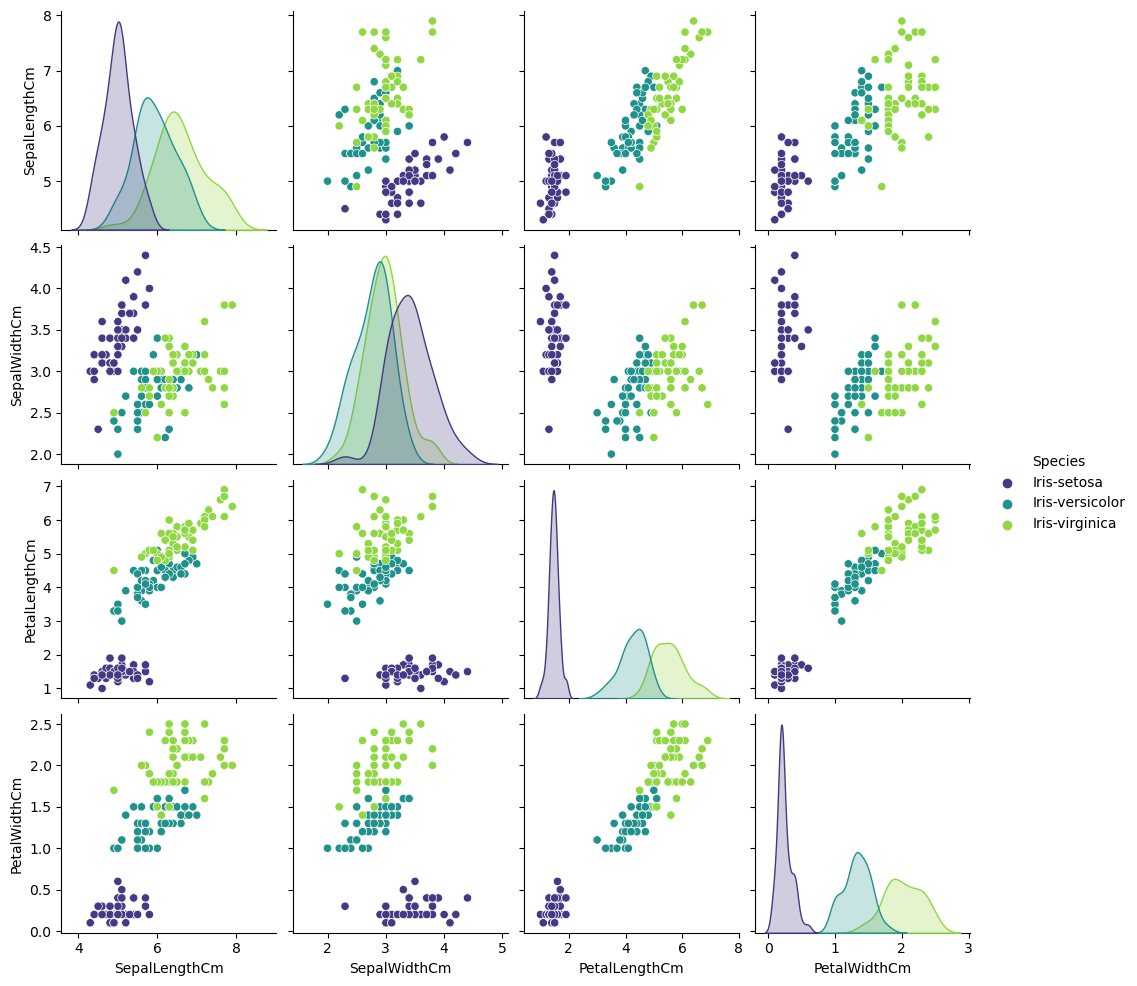

In [17]:
flower_palette = {'Iris-setosa' : sns.color_palette("viridis", n_colors = 5)[0],
                  'Iris-versicolor' : sns.color_palette("viridis", n_colors = 5)[2],
                  'Iris-virginica' : sns.color_palette("viridis", n_colors = 5)[4]}
sns.pairplot(data = df.drop('Id', axis = 1),  
             hue = 'Species', 
             palette = flower_palette)
plt.show()

The Iris dataset is a fairly well known and explored dataset, but it's worth doing EDA as a matter of best practice more than anything else. From the above pairplots, we can see there is a reasonable degree of seperation between our classes, which should make classification on these variables nice and easy. It is worth noting there is less seperation between the versicolor and virginica species, but not to the point wehere classification is impossible.

In [18]:
#Prepare the data
X = np.array(df[df.columns[1:-1]])
X = MinMaxScaler().fit_transform(X)
y = np.array(df['Species'])

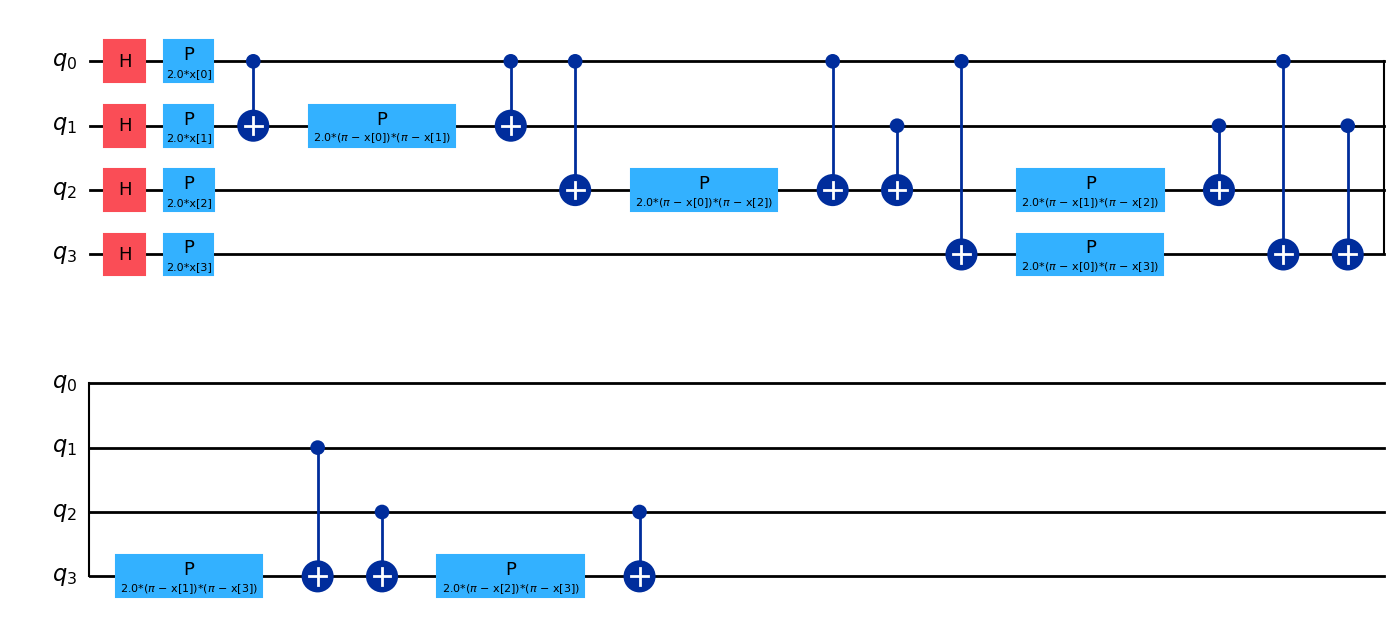

In [19]:
num_features = X.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", fold=20)

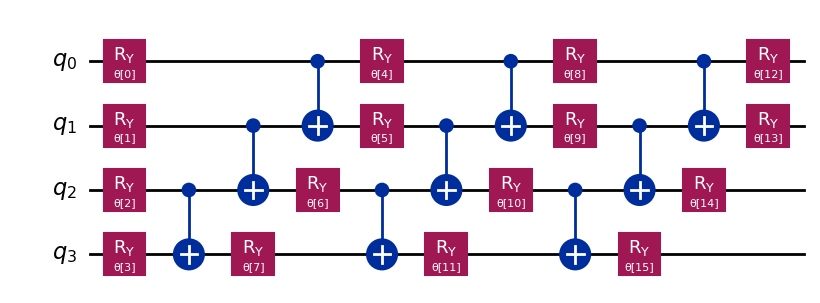

In [20]:
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

The above shows the circuits we have created for our model. The feature map takes our input features and encodes them onto a qubit that be interprated by the model. The ansatz show the weights the model uses to make its classifications, the 'reps' argument showing how many times we repeat the learning stage. We can think of these as the input layer and hidden layers of the nueral network.

now our model has been created, it's time to train it on the data:

In [21]:
pip install qiskit-algorithms

Note: you may need to restart the kernel to use updated packages.


In [22]:
!pip install qiskit-optimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 635.6/635.6 kB 32.5 MB/s eta 0:00:00
  Installing build dependencies ... - \ | done
  Getting requirements to build wheel ... - done
  Installing backend dependencies ... - \ done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for docplex: filename=docplex-2.27.239-py3-none-any.whl size=674503 sha256=2199fa1928f0eb4e976aec64b979669fa05229e816f12fa8963c99210187beb5
  Stored in directory: /root/.cache/pip/wheels/62/7c/db/cef9425e1cedbf45621545097eaaeed5efe07005bd8229dd74
Successfully built docplex


In [23]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install qiskit qiskit-machine-learning matplotlib

Note: you may need to restart the kernel to use updated packages.


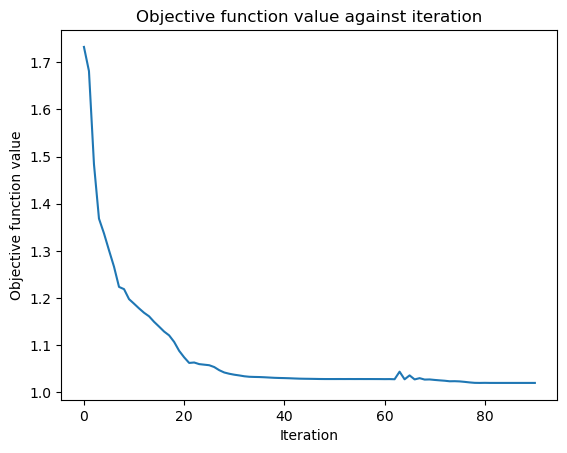

0.86

In [25]:
# optimizer = ADAM(maxiter=100)
sampler = Sampler()

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()


vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

vqc.fit(X, y)
vqc.score(X, y)

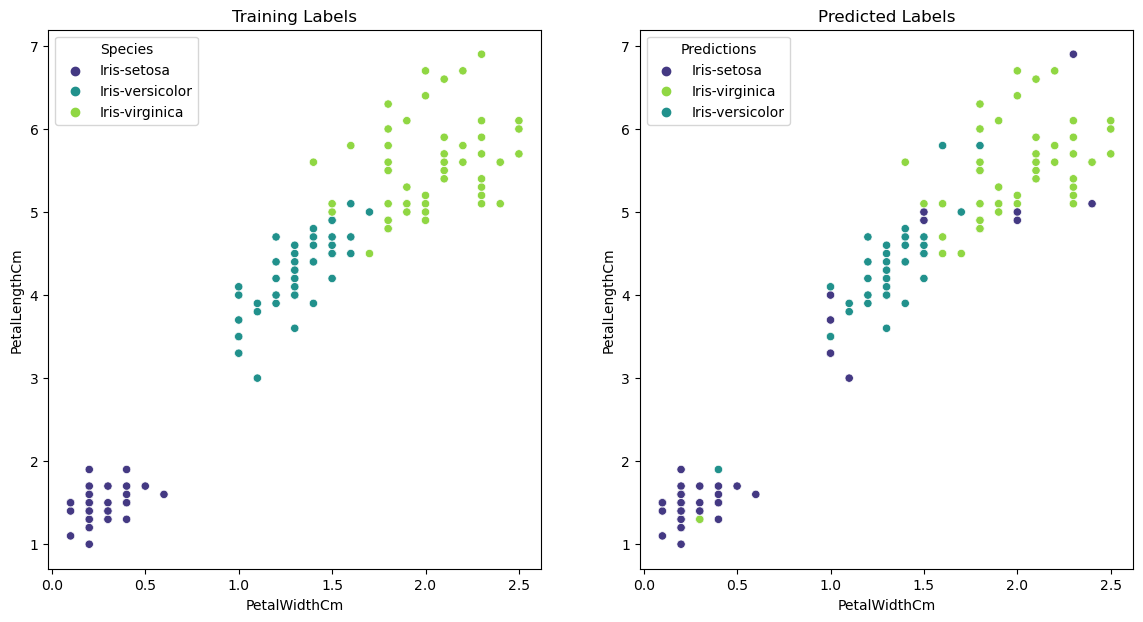

In [26]:
y_predict = vqc.predict(X)
df['Predictions'] = y_predict

flower_palette = {'Iris-setosa' : sns.color_palette("viridis", n_colors = 5)[0],
                  'Iris-versicolor' : sns.color_palette("viridis", n_colors = 5)[2],
                  'Iris-virginica' : sns.color_palette("viridis", n_colors = 5)[4]}

fig, ax = plt.subplots(1,2, figsize = (14, 7))
sns.scatterplot(data = df, x = 'PetalWidthCm', y = 'PetalLengthCm', hue = 'Species', ax = ax[0], palette = flower_palette)
sns.scatterplot(data = df, x = 'PetalWidthCm', y = 'PetalLengthCm', hue = 'Predictions', ax = ax[1], palette = flower_palette)
ax[0].set_title('Training Labels')
ax[1].set_title('Predicted Labels')
plt.show()

Out of the box, we appear to get a decent result, with an accuracy score of around 80%. However, once we plot the predictions, we can see there are some strange results. From the graph on the left, we can see that while the versicolor and virginica clusters are located relatvely close together, there are still three fairly distinct clusters for our classifier to learn from. For our predictions however, much of this information appears to have been lost, and clusters overlap significantly. Most worringly, the setosa cluster, which is seperated from the rest of the data points by a significant margin, has been mixed up with the other two.

Lets compare this result with a basic classification model from sklearn.

In [27]:
svc = SVC()
svc.fit(X, y)
svc.score(X, y)

0.98

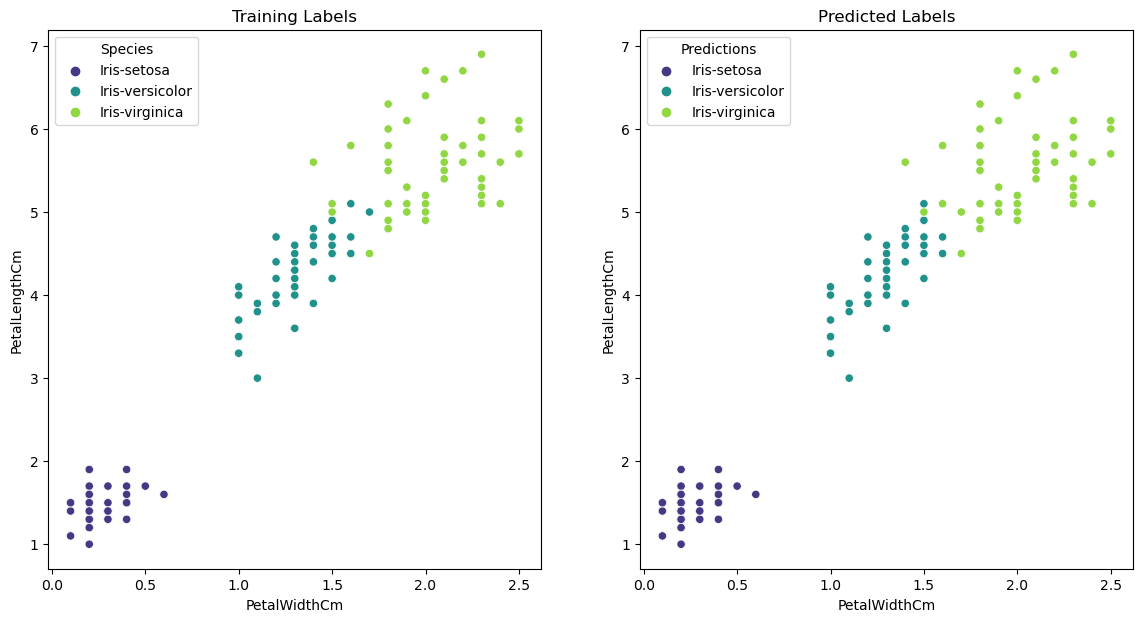

In [28]:
y_predict = svc.predict(X)
df['Predictions'] = y_predict

flower_palette = {'Iris-setosa' : sns.color_palette("viridis", n_colors = 5)[0],
                  'Iris-versicolor' : sns.color_palette("viridis", n_colors = 5)[2],
                  'Iris-virginica' : sns.color_palette("viridis", n_colors = 5)[4]}

fig, ax = plt.subplots(1,2, figsize = (14, 7))
sns.scatterplot(data = df, x = 'PetalWidthCm', y = 'PetalLengthCm', hue = 'Species', ax = ax[0], palette = flower_palette)
sns.scatterplot(data = df, x = 'PetalWidthCm', y = 'PetalLengthCm', hue = 'Predictions', ax = ax[1], palette = flower_palette)
ax[0].set_title('Training Labels')
ax[1].set_title('Predicted Labels')
plt.show()

As we can see from the above graphs, the classical model does a much better job of predicting the clusters than the quantum model.

# <div style="padding: 50px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://www.researchgate.net/publication/228581169/figure/fig2/AS:302034860429313@1449022130213/Bloch-sphere-representation-of-the-qubit-state-Control-vector-c-c-x-c-y-c-z.png);background-position: 50% 50%;background-size: 50% 200%"><b><span style='background-color:rgba(0,0,0,0.7);color:white;border-radius:5px;padding: 0px 15px'>Conclusions</span></b> </div>

Quantum computing is still in its early stages of development. While there is great potential in this technology, classical cimputation and machine learning tools built on top of it are fairly robust and mature fields of study. However, like the massive leaps and bounds AI has made in the past 8 months, there maybe a break though in the technology that makes it much more applicable to a wider scope of problems. 